<a href="https://colab.research.google.com/github/ZxcaGustavo/FiapCap1Fase5/blob/main/GustavoBeuGomes_RM560543_pbl_Fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, faça o upload do arquivo crop_yield.csv:


Saving crop_yield.csv to crop_yield (2).csv

Nomes das colunas no dataset:
Index(['Crop', 'Precipitation (mm day-1)',
       'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield'],
      dtype='object')

Primeiras linhas do dataset:
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                             

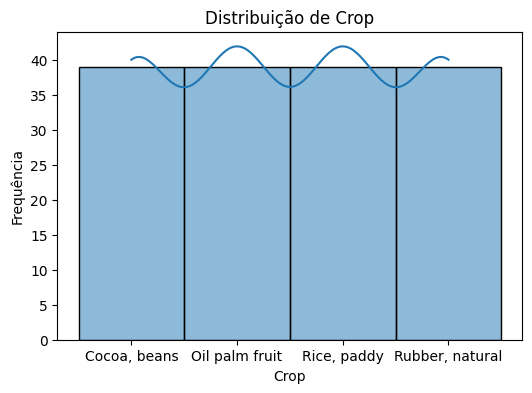

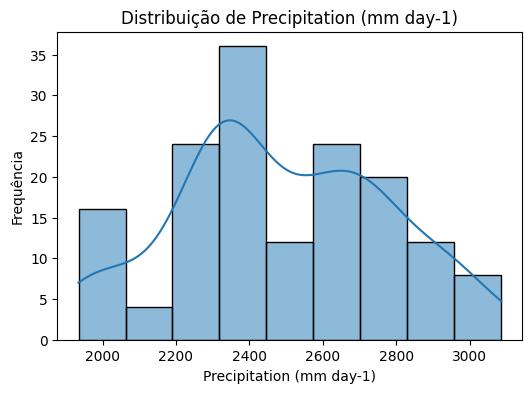

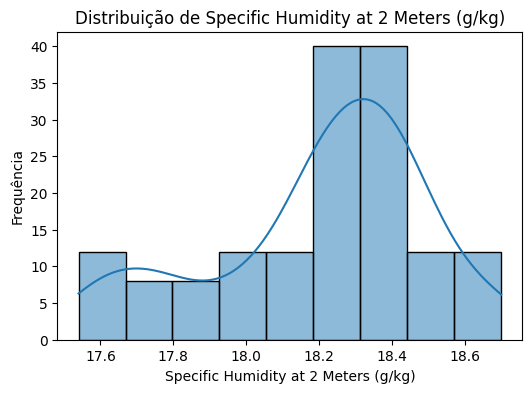

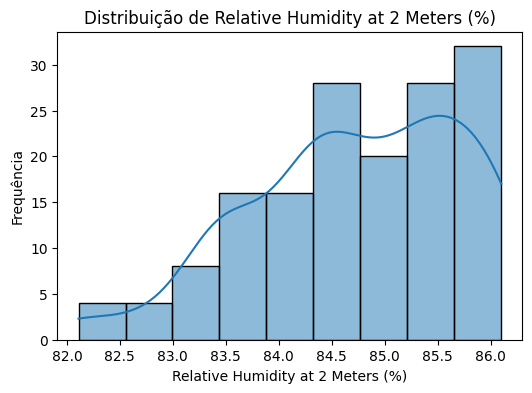

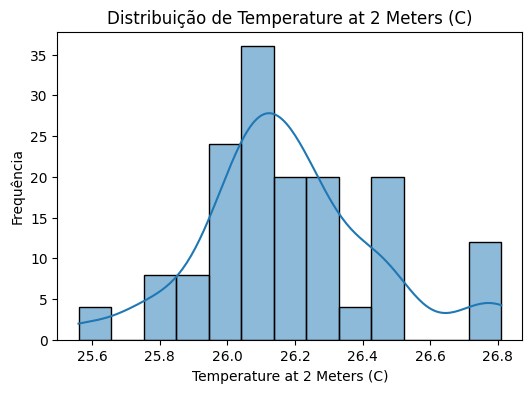

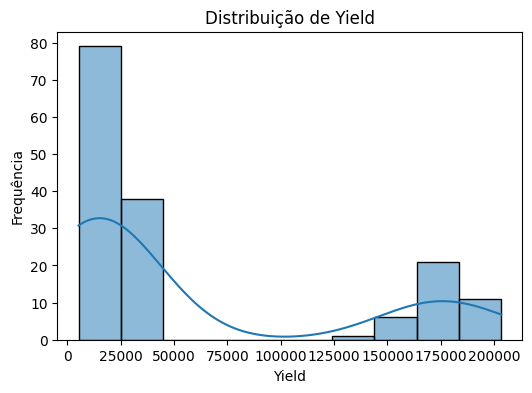


Gerando matriz de correlação (apenas colunas numéricas):


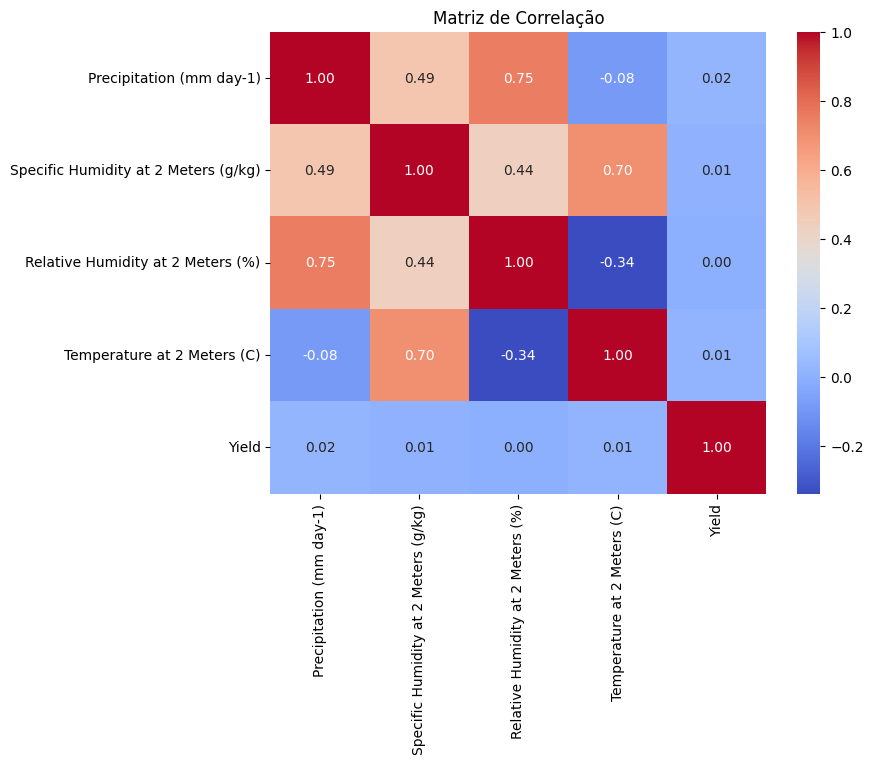


Analisando outliers com boxplots:


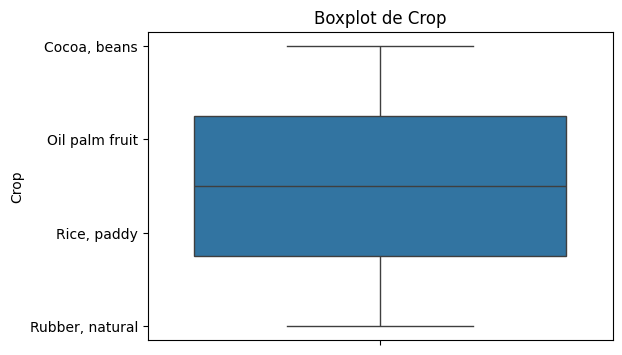

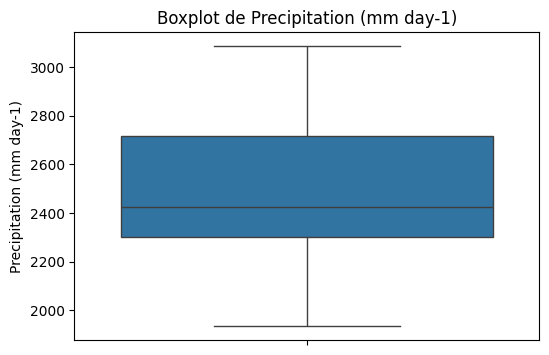

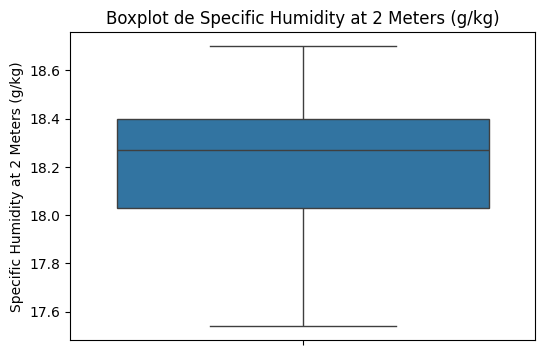

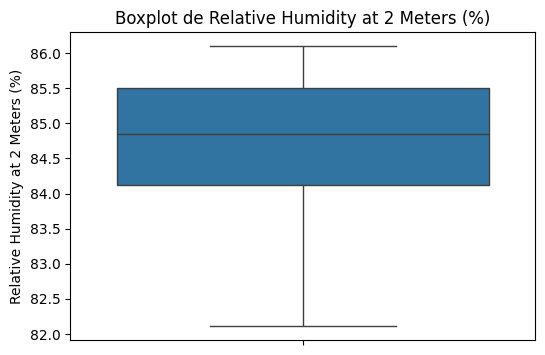

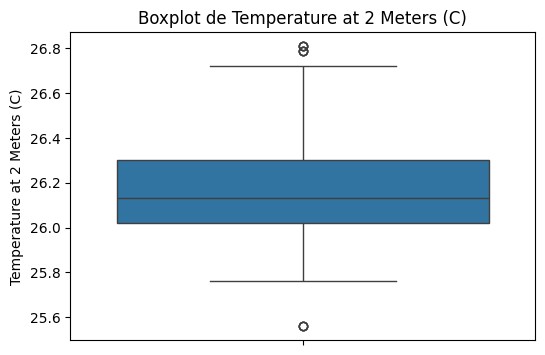

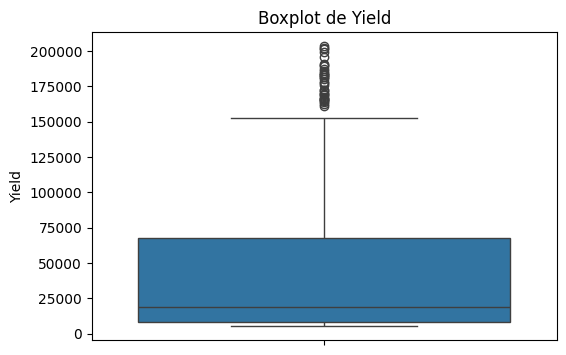

Nomes das colunas no dataset: Index(['Crop', 'Precipitation (mm day-1)',
       'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield'],
      dtype='object')
Nomes das colunas no dataset:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

Separando os dados para modelagem preditiva:
Amostra das features (X):
   Precipitation (mm day-1)  Relative Humidity at 2 Meters (%)  \
0                   2248.92                              83.40   
1                   1938.42                              82.11   
2                   2301.54                              82.79   
3                   2592.35                              85.07   
4                   2344.72                              84.12   

   Temperature at 2 Meters (C)  
0                        26.01  
1                        26.11  
2             

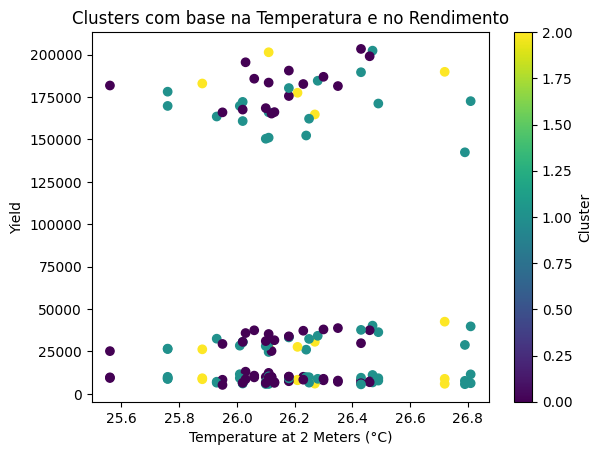

In [ ]:


# Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Upload do dataset no Colab
from google.colab import files

print("Por favor, faça o upload do arquivo crop_yield.csv:")
uploaded = files.upload()  # Faz o upload do arquivo

# Carregar o dataset
data = pd.read_csv("crop_yield.csv")

# Normalizar os nomes das colunas (remover espaços extras)
data.columns = data.columns.str.strip()
print("\nNomes das colunas no dataset:")
print(data.columns)

# Exibir as primeiras linhas do dataset
print("\nPrimeiras linhas do dataset:")
print(data.head())

# Informações sobre o dataset
print("\nInformações do dataset:")
print(data.info())

# Resumo estatístico do dataset
print("\nResumo estatístico do dataset:")
print(data.describe())

# Verificar valores ausentes
print("\nVerificando valores ausentes:")
print(data.isnull().sum())

# Análise Exploratória (EDA)
# Distribuição das variáveis
print("\nPlotando histogramas das variáveis:")
for column in data.columns:
    if column not in ['Cultura', 'Rendimento']:  # Ignorar colunas não numéricas
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribuição de {column}")
        plt.xlabel(column)
        plt.ylabel("Frequência")
        plt.show()

# Matriz de Correlação (apenas colunas numéricas)
print("\nGerando matriz de correlação (apenas colunas numéricas):")
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Selecionar apenas colunas numéricas

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Identificar possíveis outliers
print("\nAnalisando outliers com boxplots:")
for column in data.columns:
    if column not in ['Cultura', 'Rendimento']:  # Ignorar colunas não numéricas
        plt.figure(figsize=(6, 4))
        sns.boxplot(data[column])
        plt.title(f"Boxplot de {column}")
        plt.show()


print("Nomes das colunas no dataset:", data.columns)

# Remover espaços extras dos nomes das colunas, se necessário
data.columns = data.columns.str.strip()

# Verificar os nomes das colunas no dataset
print("Nomes das colunas no dataset:")
print(data.columns.tolist())

# Normalizar os nomes das colunas
data.columns = data.columns.str.strip()

# Atualizando o código com os nomes corretos das colunas
print("\nSeparando os dados para modelagem preditiva:")

# Selecionar as features (X) e o target (y)
X = data[['Precipitation (mm day-1)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = data['Yield']

# Exibir uma amostra das features e do target
print("Amostra das features (X):")
print(X.head())

print("Amostra do target (y):")
print(y.head())


# Divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Conjunto de treino (X_train):", X_train.shape)
print("Conjunto de teste (X_test):", X_test.shape)

# Conclusão da análise exploratória
print("\nA análise exploratória foi concluída com sucesso!")

# Dividir em dados de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho dos dados de treino: {X_train.shape}")
print(f"Tamanho dos dados de teste: {X_test.shape}")

# Criar e treinar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fazer previsões
y_pred = linear_model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# Aplicar K-Means para identificar padrões
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar os clusters ao dataframe
data['Cluster'] = clusters

# Visualizar os clusters
print("\nClusters gerados:")
print(data[['Cluster', 'Yield']].groupby('Cluster').mean())

# Plotando clusters
plt.scatter(data['Temperature at 2 Meters (C)'], data['Yield'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Temperature at 2 Meters (°C)')
plt.ylabel('Yield')
plt.title('Clusters com base na Temperatura e no Rendimento')
plt.colorbar(label='Cluster')
plt.show()


